In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the synthetic dataset
data = pd.read_csv('synthetic_dairy_feed_dataset.csv')

# Define features and target
features = ['Breed', 'Age', 'Weight (kg)', 'Lactation Stage', 
            'Daily Feed (kg)', 'Protein %', 'Fat %', 'Fiber %', 
            'Temp (°C)', 'Humidity (%)']
target = 'Milk Yield (L/day)'

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Preprocess the data
categorical_features = ['Breed', 'Lactation Stage']
numerical_features = ['Age', 'Weight (kg)', 'Daily Feed (kg)', 
                      'Protein %', 'Fat %', 'Fiber %', 
                      'Temp (°C)', 'Humidity (%)']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MAE: {mae_linear}, R2: {r2_linear}")

#Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, R2: {r2_rf}")

#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MAE: {mae_gb}, R2: {r2_gb}")

#Neural Network
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from sklearn.metrics import mean_absolute_error, r2_score

# Build the neural network model
nn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Calculate MAE and R² score
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Display the evaluation metrics
print(f"Neural Network - MAE: {mae_nn}, R²: {r2_nn}")


Linear Regression - MAE: 0.11888566687567506, R2: 0.9987663616820163
Random Forest - MAE: 0.3186780000000018, R2: 0.9927390736392373
Gradient Boosting - MAE: 0.18824606688234624, R2: 0.9975337524999771
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Neural Network - MAE: 0.40095834922790524, R²: 0.9875228638476373


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


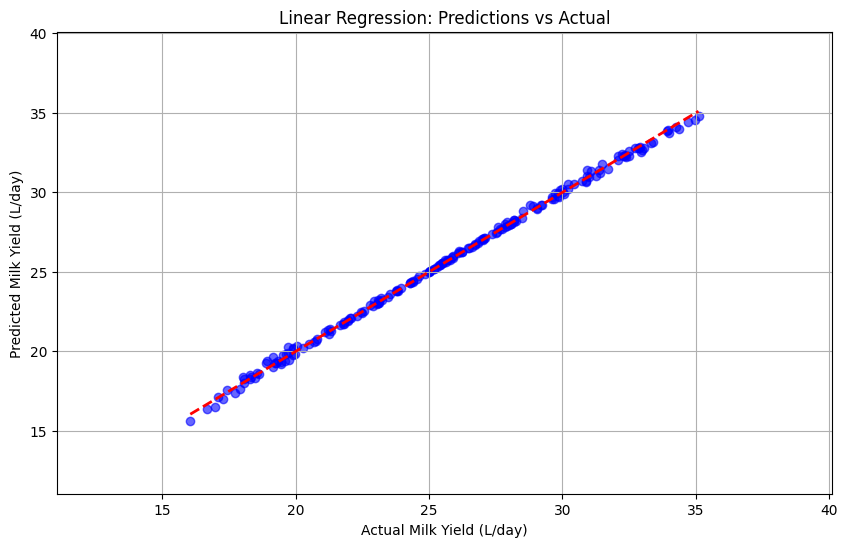

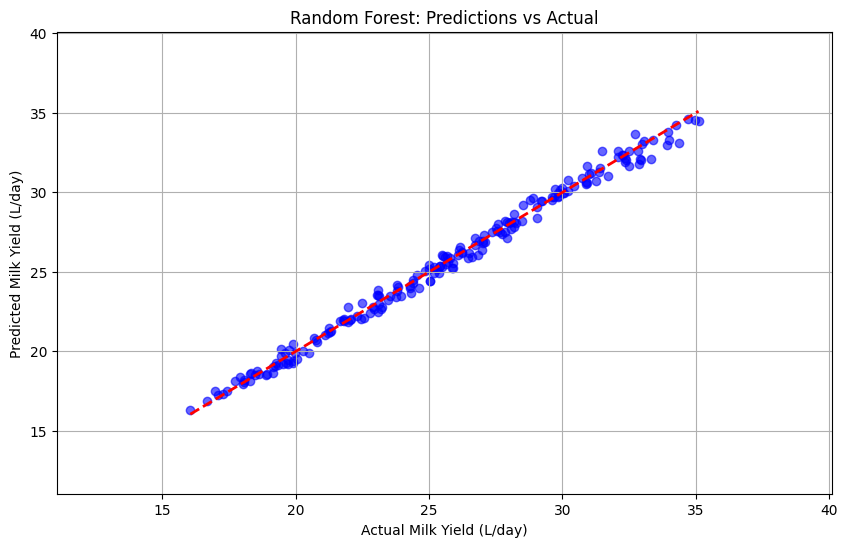

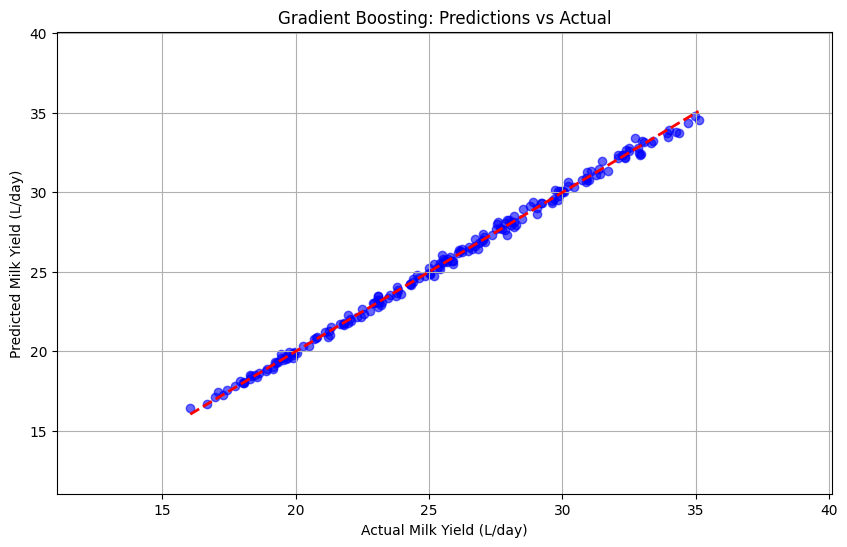

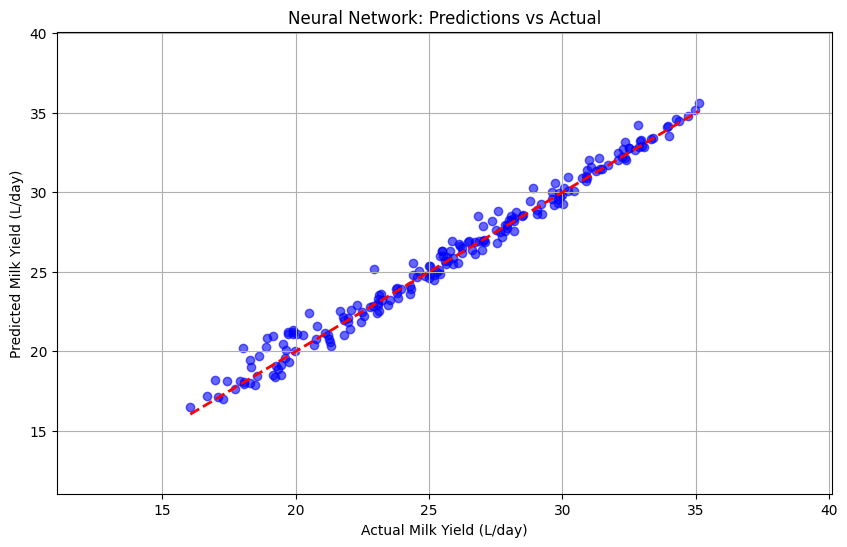

Feed Cost: $1400.00 USD/day
Linear Regression - MAE: 0.1189, R²: 0.9988, Avg Predicted Milk Yield: 25.66 L/day
Random Forest - MAE: 0.3187, R²: 0.9927, Avg Predicted Milk Yield: 25.59 L/day
Gradient Boosting - MAE: 0.1882, R²: 0.9975, Avg Predicted Milk Yield: 25.65 L/day
Neural Network - MAE: 0.4560, R²: 0.9826, Avg Predicted Milk Yield: 25.82 L/day


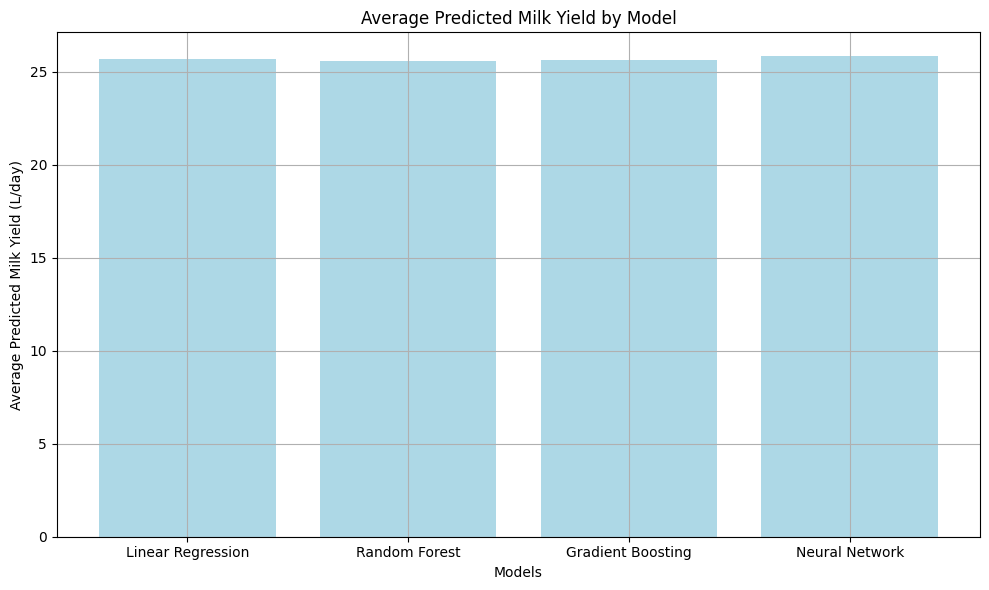

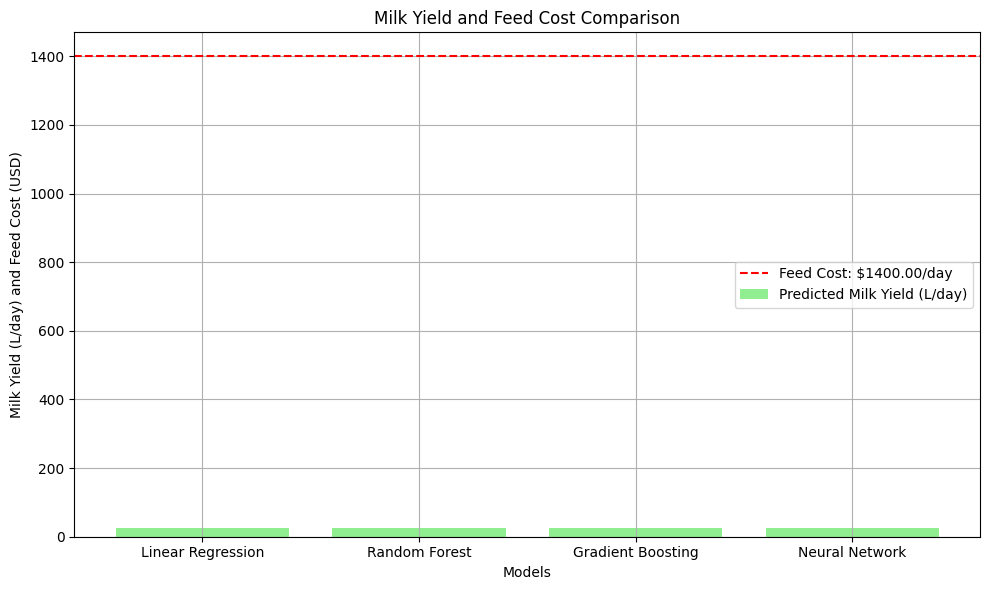

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score



# Define the cost parameters for feed
cost_per_protein = 1.5
cost_per_fat = 2.0
cost_per_fiber = 0.8

# Function to calculate feed cost
def calculate_feed_cost(protein_pct, fat_pct, fiber_pct, daily_feed_kg):
    return (protein_pct * cost_per_protein +
            fat_pct * cost_per_fat +
            fiber_pct * cost_per_fiber) * daily_feed_kg

# Example feed composition and daily feed input
protein_pct = 18.0  # Example: 18% protein
fat_pct = 6.5       # Example: 6.5% fat
fiber_pct = 20.0    # Example: 20% fiber
daily_feed_kg = 25  # Example: 25 kg of feed per day

# Calculate feed cost
feed_cost = calculate_feed_cost(protein_pct, fat_pct, fiber_pct, daily_feed_kg)

# Dictionary to store predictions for all models
predictions = {}

# Predictions for Linear Regression
y_pred_linear = linear_model.predict(X_test)
predictions['Linear Regression'] = y_pred_linear

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)
predictions['Random Forest'] = y_pred_rf

# Predictions for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
predictions['Gradient Boosting'] = y_pred_gb

# Predictions for Neural Networks
y_pred_nn = nn_model.predict(X_test)
predictions['Neural Network'] = y_pred_nn

# Function to plot predictions vs actual values
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # diagonal line
    plt.title(f'{model_name}: Predictions vs Actual')
    plt.xlabel('Actual Milk Yield (L/day)')
    plt.ylabel('Predicted Milk Yield (L/day)')
    plt.grid()
    plt.xlim(y_test.min() - 5, y_test.max() + 5)
    plt.ylim(y_test.min() - 5, y_test.max() + 5)
    plt.show()

# Plot predictions for all models
for model_name, y_pred in predictions.items():
    plot_predictions(y_test, y_pred, model_name)

# Print the feed cost
print(f"Feed Cost: ${feed_cost:.2f} USD/day")

# Function to calculate and print MAE and R² for each model
def evaluate_models(y_test, predictions):
    for model_name, y_pred in predictions.items():
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Calculate and print the average milk yield for each model
        avg_yield = np.mean(y_pred)  # Average milk yield prediction
        print(f"{model_name} - MAE: {mae:.4f}, R²: {r2:.4f}, Avg Predicted Milk Yield: {avg_yield:.2f} L/day")

# Evaluate all models and print MAE, R², and average milk yield
evaluate_models(y_test, predictions)

# Function to plot predicted milk yield for all models
def plot_predicted_yields(predictions):
    model_names = list(predictions.keys())
    predicted_yields = [np.mean(pred) for pred in predictions.values()]  # average predicted milk yield

    plt.figure(figsize=(10, 6))
    plt.bar(model_names, predicted_yields, color='lightblue')
    plt.xlabel('Models')
    plt.ylabel('Average Predicted Milk Yield (L/day)')
    plt.title('Average Predicted Milk Yield by Model')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot predicted milk yields
plot_predicted_yields(predictions)

# Plot feed cost and milk yield comparison (optional)
def plot_yield_vs_cost(predictions, feed_cost):
    model_names = list(predictions.keys())
    predicted_yields = [np.mean(pred) for pred in predictions.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(model_names, predicted_yields, color='lightgreen', label='Predicted Milk Yield (L/day)')
    plt.axhline(y=feed_cost, color='r', linestyle='--', label=f'Feed Cost: ${feed_cost:.2f}/day')
    plt.xlabel('Models')
    plt.ylabel('Milk Yield (L/day) and Feed Cost (USD)')
    plt.title('Milk Yield and Feed Cost Comparison')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot comparison of milk yield and feed cost
plot_yield_vs_cost(predictions, feed_cost)
